In [1]:
import xgboost as xgb
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geoplot as gplt
import geoplot.crs as gcrs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import contextily as cx

In [2]:
data = gpd.read_file('../dataset/bonston_funcblock_with_centroids.gpkg')

In [3]:
data

,id_block,LU,cls_Unk,cls_A,cls_AH,cls_C,cls_CL,cls_CM,cls_CP,cls_I,...,std_BOY_in,aver_M11,std_M11,aver_eccen,std_eccent,aver_densi,std_densit,lon,lat,geometry
0,6,Commercial,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,-50.414952,0.000000,428.722810,0.000000,0.006451,0.000000,-71.076431,42.386161,"MULTIPOLYGON (((-71.07635 42.38620, -71.07635 ..."
1,7,Commercial,0.0,0.0,0.0,0.940390,0.059610,0.0,0.0,0.0,...,0.047295,-53.279577,65.380497,6823.964477,8267.378348,0.090087,0.018621,-71.160933,42.257607,"MULTIPOLYGON (((-71.16059 42.25748, -71.16070 ..."
2,8,Commercial,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0,...,0.000000,-1049.402964,0.000000,22368.509799,0.000000,0.171296,0.000000,-71.157989,42.257993,"MULTIPOLYGON (((-71.15767 42.25801, -71.15763 ..."
3,9,Commercial,0.0,0.0,0.0,0.700692,0.299308,0.0,0.0,0.0,...,0.041597,167.568440,304.183450,2362.979048,1640.652456,0.142493,0.047156,-71.161108,42.258392,"MULTIPOLYGON (((-71.16058 42.25861, -71.16068 ..."
4,10,Commercial,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0,...,0.000000,-61.805733,0.000000,1013.583268,0.000000,0.133715,0.000000,-71.159231,42.259205,"MULTIPOLYGON (((-71.15926 42.25926, -71.15914 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17881,17401,Residential,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-71.049469,42.358043,"MULTIPOLYGON (((-71.04943 42.35791, -71.04949 ..."
17882,17402,Residential,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-71.049417,42.358234,"MULTIPOLYGON (((-71.04939 42.35814, -71.04945 ..."
17883,17403,Residential,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-71.050119,42.358239,"MULTIPOLYGON (((-71.05016 42.35824, -71.05016 ..."
17884,17411,Residential,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-71.050182,42.364794,"MULTIPOLYGON (((-71.05025 42.36481, -71.05008 ..."


In [4]:
le = LabelEncoder()

In [5]:
data['LU_cls'] = le.fit_transform(data['LU'])

In [6]:
data.columns

Index(['id_block', 'LU', 'cls_Unk', 'cls_A', 'cls_AH', 'cls_C', 'cls_CL',
       'cls_CM', 'cls_CP', 'cls_I', 'cls_R1', 'cls_R2', 'cls_R3', 'cls_R4',
       'cls_RC', 'cls_RL', 'cls_Tax', 'num_buil_1', 'aver_area', 'std_area',
       'aver_peri', 'std_peri', 'aver_long_', 'std_long_c', 'aver_mean_',
       'std_mean_r', 'aver_smbr_', 'std_smbr_o', 'aver_longe', 'std_longed',
       'aver_bisse', 'std_bissec', 'aver_weigh', 'std_weight', 'aver_ric_c',
       'std_ric_co', 'aver_ipq_c', 'std_ipq_co', 'aver_fra_c', 'std_fra_co',
       'aver_gib_c', 'std_gib_co', 'aver_div_c', 'std_div_co', 'aver_elong',
       'std_elonga', 'aver_ellip', 'std_ellipt', 'aver_conca', 'std_concav',
       'aver_DCM_i', 'std_DCM_in', 'aver_BOT_i', 'std_BOT_in', 'aver_BOY_i',
       'std_BOY_in', 'aver_M11', 'std_M11', 'aver_eccen', 'std_eccent',
       'aver_densi', 'std_densit', 'lon', 'lat', 'geometry', 'LU_cls'],
      dtype='object')

In [7]:
y = data['LU_cls']
X = data[['num_buil_1', 'aver_area', 'std_area',
       'aver_peri', 'std_peri', 'aver_long_', 'std_long_c', 'aver_mean_',
       'std_mean_r', 'aver_smbr_', 'std_smbr_o', 'aver_longe', 'std_longed',
       'aver_bisse', 'std_bissec', 'aver_weigh', 'std_weight', 'aver_ric_c',
       'std_ric_co', 'aver_ipq_c', 'std_ipq_co', 'aver_fra_c', 'std_fra_co',
       'aver_gib_c', 'std_gib_co', 'aver_div_c', 'std_div_co', 'aver_elong',
       'std_elonga', 'aver_ellip', 'std_ellipt', 'aver_conca', 'std_concav',
       'aver_DCM_i', 'std_DCM_in', 'aver_BOT_i', 'std_BOT_in', 'aver_BOY_i',
       'std_BOY_in', 'aver_M11', 'std_M11', 'aver_eccen', 'std_eccent',
       'aver_densi', 'std_densit', 'lat', 'lon']]
loc = data[['lon','lat']]
geometry = data['geometry']

In [8]:
X_train, X_temp, y_train, y_temp, loc_train, loc_temp, geo_train, geo_temp = train_test_split(X, y, loc, geometry, train_size=0.6, random_state=42)

In [9]:
X_calib, X_test, y_calib, y_test, loc_calib, loc_test, geo_calib, geo_test = train_test_split(X_temp, y_temp, loc_temp, geo_temp, train_size=0.5, random_state=42)

In [10]:
model = xgb.XGBClassifier(n_estimators=100, max_depth=2, min_child_weight=1.0, colsample_bytree=1.0).fit(X_train, y_train)

In [11]:
model.score(X_test, y_test)

0.6484069312465064

In [12]:
from GeoConformalPrediction import GeoConformalClassifier

In [13]:
geocp_classifier = GeoConformalClassifier(predict_f=model.predict_proba, x_calib=X_calib.values, y_calib=y_calib, coord_calib=loc_calib.values, bandwidth=0.2, miscoverage_level=0.1, nonconformity_score='rank')

In [14]:
results = geocp_classifier.geo_conformalized(X_test.values, y_test, loc_test.values)

In [15]:
results.coverage

0.5558971492453885

In [16]:
results_geo = results.to_gpd()

In [17]:
geo_test.values

<GeometryArray>
[<MULTIPOLYGON (((-71.071 42.296, -71.071 42.296, -71.071 42.296, -71.071 42....>,
 <MULTIPOLYGON (((-71.06 42.325, -71.06 42.325, -71.06 42.325, -71.06 42.325,...>,
 <MULTIPOLYGON (((-71.159 42.356, -71.159 42.356, -71.159 42.356, -71.159 42....>,
 <MULTIPOLYGON (((-71.058 42.375, -71.058 42.375, -71.058 42.375, -71.058 42....>,
 <MULTIPOLYGON (((-71.127 42.275, -71.127 42.275, -71.127 42.275, -71.127 42....>,
 <MULTIPOLYGON (((-71.091 42.347, -71.091 42.347, -71.091 42.347, -71.091 42....>,
 <MULTIPOLYGON (((-71.082 42.35, -71.082 42.35, -71.082 42.35, -71.082 42.35,...>,
 <MULTIPOLYGON (((-71.121 42.262, -71.121 42.262, -71.121 42.262, -71.121 42....>,
 <MULTIPOLYGON (((-71.056 42.361, -71.056 42.361, -71.056 42.361, -71.056 42....>,
 <MULTIPOLYGON (((-71.066 42.316, -71.066 42.316, -71.066 42.316, -71.066 42....>,
 ...
 <MULTIPOLYGON (((-71.128 42.354, -71.128 42.354, -71.128 42.354, -71.128 42....>,
 <MULTIPOLYGON (((-71.033 42.377, -71.033 42.377, -71.032 42.377, 

In [18]:
results_geo['geometry'] = geo_test.values

In [19]:
results_geo

,geo_uncertainty,pred_value,true_value,x,y,geometry
0,3.0,2.0,4.0,-71.071108,42.295506,"MULTIPOLYGON (((-71.07107 42.29564, -71.07104 ..."
1,3.0,3.0,0.0,-71.059961,42.324737,"MULTIPOLYGON (((-71.05998 42.32461, -71.06011 ..."
2,3.0,5.0,5.0,-71.159717,42.355369,"MULTIPOLYGON (((-71.15910 42.35566, -71.15909 ..."
3,3.0,2.0,2.0,-71.057713,42.374642,"MULTIPOLYGON (((-71.05769 42.37473, -71.05762 ..."
4,3.0,5.0,5.0,-71.126221,42.274953,"MULTIPOLYGON (((-71.12658 42.27506, -71.12665 ..."
...,...,...,...,...,...,...
3573,3.0,0.0,2.0,-71.059180,42.298188,"MULTIPOLYGON (((-71.05977 42.29788, -71.05987 ..."
3574,3.0,5.0,5.0,-71.153250,42.266848,"MULTIPOLYGON (((-71.15260 42.26671, -71.15250 ..."
3575,3.0,2.0,0.0,-71.041166,42.287678,"MULTIPOLYGON (((-71.04149 42.28784, -71.04149 ..."
3576,3.0,2.0,2.0,-71.076424,42.356328,"MULTIPOLYGON (((-71.07643 42.35633, -71.07643 ..."


<GeoAxes: >

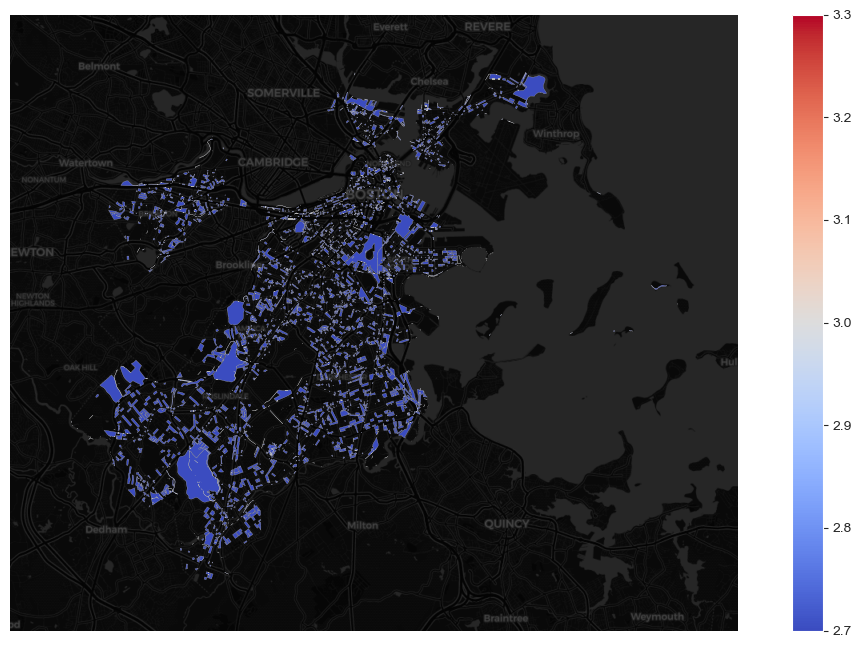

In [20]:
utm = gcrs.WebMercator()

ax = gplt.webmap(results_geo, projection=utm, figsize=(14, 8), provider=cx.providers.CartoDB.DarkMatter)

gplt.choropleth(results_geo,
                hue='geo_uncertainty',
                cmap='coolwarm',
                legend=True,
                edgecolor='#b8b8b8',
                linewidth=0.2,
                ax=ax)

# plt.savefig('./boston_prediction_set_size.png', bbox_inches='tight', dpi=600)

In [21]:
prediction_sets = results.prediction_sets

In [22]:
prediction_sets

array([[ True, False,  True,  True, False, False],
       [False, False,  True,  True,  True, False],
       [ True, False, False,  True,  True, False],
       ...,
       [ True, False,  True, False,  True, False],
       [ True, False,  True,  True, False, False],
       [ True, False, False, False,  True,  True]])

In [23]:
np.where(prediction_sets)[1]

array([0, 2, 3, ..., 0, 4, 5], dtype=int64)

In [24]:
idx = [np.where(row)[0] for row in prediction_sets]

In [25]:
le.inverse_transform(idx[3])

array(['Commercial', 'Institutional', 'Residential'], dtype=object)